Data Cleaning is the process of fixing or removing incorrect,corrupted ,incorrectly formatted ,duplicate or incomplete data within a dataset

In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
car = pd.read_csv('quikr_car.csv')

In [68]:
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [69]:
car['Price'].value_counts()

Ask For Price    35
2,50,000         17
3,50,000         14
1,80,000         13
1,30,000         12
                 ..
5,19,000          1
1,78,000          1
5,48,900          1
3,51,000          1
21,90,000         1
Name: Price, Length: 274, dtype: int64

In [70]:
car.shape

(892, 6)

In [71]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [72]:
car.isnull().sum()

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

# Handling Missing Values:

In [73]:
((car.isnull().sum())/car.shape[0])*100

name          0.000000
company       0.000000
year          0.000000
Price         0.000000
kms_driven    5.829596
fuel_type     6.165919
dtype: float64

In [74]:
car.dropna(inplace=True)

# Extracting new feature from existing feature


In [75]:
x = car['name'][0]
x

'Hyundai Santro Xing XO eRLX Euro III'

In [76]:
x.index(" ")

7

In [77]:
x[:x.index(" ")]

'Hyundai'

In [78]:
x.index(" ")+1

8

In [79]:
x[:x.index(" ")+1]

'Hyundai '

In [80]:
def comp_name(x):
    return x[:x.index(" ")]

In [81]:
def car_name(x):
    return x[x.index(" ")+1:]

In [82]:
car['car_name'] = car["name"].apply(car_name)

In [83]:
car.head()

,name,company,year,Price,kms_driven,fuel_type,car_name
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol,Santro Xing XO eRLX Euro III
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel,Jeep CL550 MDI
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol,Suzuki Alto 800 Vxi
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol,Grand i10 Magna 1.2 Kappa VTVT
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel,EcoSport Titanium 1.5L TDCi


In [84]:
#Data Bining: 

In [85]:
car.Price.describe()

count               837
unique              273
top       Ask For Price
freq                 21
Name: Price, dtype: object

In [86]:
car['Price']=car['Price'].str.replace(",","")

In [87]:
car["Price"].value_counts()

Ask For Price    21
250000           16
350000           12
400000           11
130000           11
                 ..
1490000           1
470000            1
940000            1
59000             1
675000            1
Name: Price, Length: 273, dtype: int64

In [88]:
car.columns

Index(['name', 'company', 'year', 'Price', 'kms_driven', 'fuel_type',
       'car_name'],
      dtype='object')

In [89]:
car.sample(4)

,name,company,year,Price,kms_driven,fuel_type,car_name
152,Renault Duster,Renault,2013,399999,"41,000 kms",Diesel,Duster
299,Tata Indica V2 Xeta e GLE,Tata,2008,150000,"11,000 kms",Petrol,Indica V2 Xeta e GLE
570,Hyundai i10,Hyundai,2009,215000,"27,000 kms",Petrol,i10
128,Maruti Suzuki Alto 800,Maruti,2018,200000,"7,500 kms",Petrol,Suzuki Alto 800


In [90]:
#Data preprocessing
car['kms_driven']= car['kms_driven'].str.replace(",","")
car['kms_driven']= car['kms_driven'].str.replace("kms","")

In [91]:
car["year"]=car["year"].astype("int")
car["kms_driven"]=car["kms_driven"].astype("float64")

In [92]:
car['Price'] = car['Price'].replace('Ask For Price', '0')



In [93]:
car['Price'].value_counts()

0          21
250000     16
350000     12
400000     11
130000     11
           ..
1600000     1
470000      1
940000      1
59000       1
675000      1
Name: Price, Length: 273, dtype: int64

In [94]:
car["Price"]=car["Price"].astype("float64")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

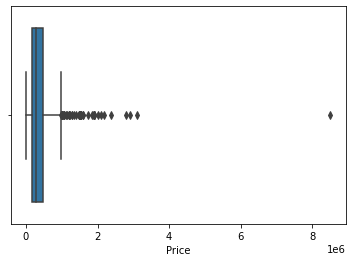

In [95]:
sns.boxplot('Price',data=car)

In [96]:
median = car.Price.median()
car['Price'] = car['Price'].replace( '-1',median)

In [97]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 837 entries, 0 to 889
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        837 non-null    object 
 1   company     837 non-null    object 
 2   year        837 non-null    int32  
 3   Price       837 non-null    float64
 4   kms_driven  837 non-null    float64
 5   fuel_type   837 non-null    object 
 6   car_name    837 non-null    object 
dtypes: float64(2), int32(1), object(4)
memory usage: 81.3+ KB


In [98]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range (len(corr_matrix.columns)):
        for j in range(i):
            if (abs(corr_matrix.iloc[i,j]) > threshold):
                col_name = corr_matrix.columns[i]
                col_corr.add(col_name)
    return col_corr

In [99]:
corr_features = correlation(car,0.7)

In [100]:
corr_features

set()

In [101]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 837 entries, 0 to 889
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        837 non-null    object 
 1   company     837 non-null    object 
 2   year        837 non-null    int32  
 3   Price       837 non-null    float64
 4   kms_driven  837 non-null    float64
 5   fuel_type   837 non-null    object 
 6   car_name    837 non-null    object 
dtypes: float64(2), int32(1), object(4)
memory usage: 81.3+ KB


In [102]:
car['fuel_type'].value_counts()

Petrol    440
Diesel    395
LPG         2
Name: fuel_type, dtype: int64

In [103]:
car['company'].value_counts()

Maruti        229
Hyundai       143
Mahindra       99
Tata           67
Honda          60
Toyota         38
Chevrolet      34
Renault        34
Ford           31
Volkswagen     20
Skoda          13
Audi           11
Mini            8
Datsun          8
BMW             8
Nissan          6
Mercedes        6
Mitsubishi      6
Force           4
Fiat            4
Hindustan       3
Jaguar          2
Land            1
Volvo           1
Jeep            1
Name: company, dtype: int64

In [104]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()

In [105]:
car['company'] = le.fit_transform(car['company'])
car['fuel_type'] = le.fit_transform(car['fuel_type'])

In [106]:
car.columns

Index(['name', 'company', 'year', 'Price', 'kms_driven', 'fuel_type',
       'car_name'],
      dtype='object')

In [107]:
X = car[[ 'company', 'year', 'kms_driven', 'fuel_type']]
y = car["Price"]

In [108]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [109]:
#Apply SelectKBest
ordered_rank_features = SelectKBest(score_func=chi2,k=4)
ordered_feature = ordered_rank_features.fit(X,y)

In [110]:
feature_score = pd.DataFrame(ordered_feature.scores_,columns=['Feature_score'])

In [111]:
cols = pd.DataFrame(X.columns)
feature_rank = pd.concat([cols,feature_score],axis=1)
feature_rank.columns=['Features','Score']


In [112]:
feature_rank

,Features,Score
0,company,7.801869e+02
1,year,4.185198e+00
2,kms_driven,7.509751e+06
3,fuel_type,3.497653e+02


In [113]:
from sklearn.ensemble import ExtraTreesClassifier

In [114]:
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [115]:
print(model.feature_importances_)

[0.2018714  0.21267684 0.57229924 0.01315252]


In [116]:
ranked_features = pd.Series(model.feature_importances_,index = X.columns)

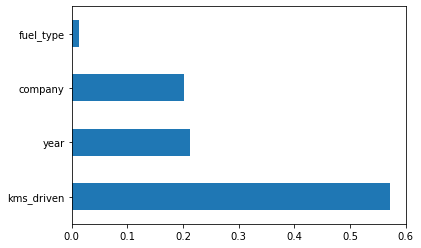

In [117]:
ranked_features.nlargest(10).plot(kind='barh')
plt.show()

# Model Building

In [118]:
X

,company,year,kms_driven,fuel_type
0,9,2007,45000.0,2
1,13,2006,40.0,0
2,14,2018,22000.0,2
3,9,2014,28000.0,2
4,6,2014,36000.0,0
...,...,...,...,...
883,14,2011,50000.0,2
885,21,2009,30000.0,0
886,22,2009,132000.0,2
888,21,2018,27000.0,0


In [119]:
y

0       80000.0
1      425000.0
2           0.0
3      325000.0
4      575000.0
         ...   
883    270000.0
885    110000.0
886    300000.0
888    260000.0
889    390000.0
Name: Price, Length: 837, dtype: float64

In [120]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state =42)


In [121]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(627, 4)
(210, 4)
(627,)
(210,)


In [141]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()

In [149]:
X_train_transform = scaler.fit_transform(X_train)
X_test_transform = scaler.transform(X_test)

In [150]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()


In [151]:
model

LinearRegression()

In [152]:
model.fit(X_train_transform,y_train)

LinearRegression()

In [153]:
predictions = model.predict(X_test_transform)

In [154]:
len(predictions)

210

In [155]:
result = pd.DataFrame({'Actual': y_test,'Predicted':predictions})

In [131]:
result

,Actual,Predicted
215,390000.0,701340.199685
874,510000.0,487325.630149
79,1891111.0,320711.360083
67,182000.0,176157.414895
423,610000.0,577915.260234
...,...,...
322,444999.0,553565.335573
260,195000.0,571949.511211
485,650000.0,654617.580909
785,380000.0,264295.668447


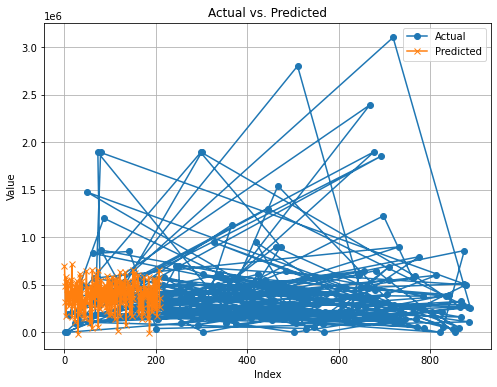

In [159]:
plt.figure(figsize=(8, 6))
plt.plot(y_test, label='Actual', marker='o')
plt.plot(predictions, label='Predicted', marker='x')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs. Predicted')
plt.legend()
plt.grid(True)
plt.show()

In [162]:
car.sample(3)

,name,company,year,Price,kms_driven,fuel_type,car_name
759,Hyundai Verna 1.6 CRDI SX Plus AT,9,2012,600000.0,29000.0,0,Verna 1.6 CRDI SX Plus AT
771,Hyundai Santro,9,2002,60000.0,47000.0,2,Santro
684,Maruti Suzuki Swift Dzire VXi 1.2 BS IV,14,2009,210000.0,59000.0,2,Suzuki Swift Dzire VXi 1.2 BS IV


In [163]:
p =[[9,2002,47000.0,2]]


In [164]:
print(model.predict(p))

[-1.7230588e+09]


# Evaluation of the model

In [156]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [157]:
mse = mean_squared_error(y_test,predictions)
mae = mean_absolute_error(y_test,predictions)
rmse = np.sqrt(np.mean((y_test - predictions) ** 2))

In [158]:
print('Mean Squared Error :',mse)
print('Mean Absolute Error :',mae)
print('RMSE : ',rmse)

Mean Squared Error : 196609859714.28583
Mean Absolute Error : 237696.26152183732
RMSE :  443407.10381576634
